# 6. seaborn
* matplotlib을 기반으로 다양한 색상테마와 통계용 그래프 기능을 추가한 시각화 라이브러리 
* seaborn에서만 제공되는 통계기반 plot : countplot, boxplot, violinplot, heatmap
* DataFrame을 이용해서 데이터를 시각화하는데 유용함


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
# seaborn에서 제공하는 datasets
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [35]:
df.shape

(144, 3)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [37]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [38]:
df.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [39]:
df.year.value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

## 6-1. Line Plot
* 선 주위의 파란색은 데이터의 신뢰구간을 표시

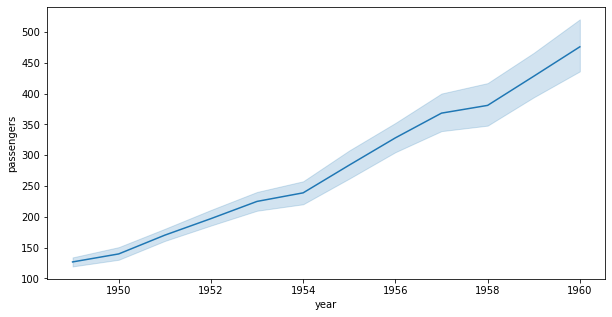

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='passengers', data=df)
plt.show()

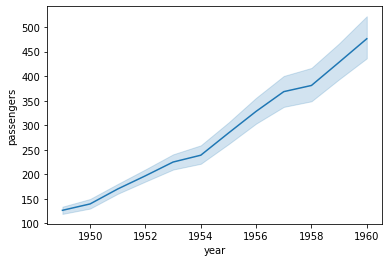

In [41]:
sns.lineplot(x=df.year, y=df.passengers)
plt.show()

## 6-2. Scatter Plot

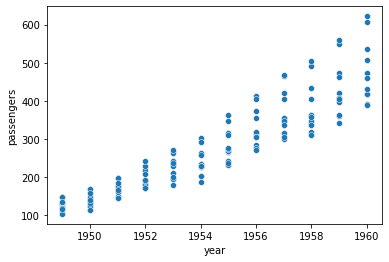

In [42]:
sns.scatterplot(x='year', y='passengers', data=df)
plt.show()

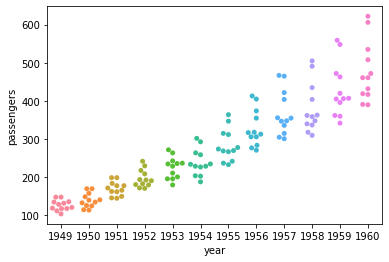

In [43]:
# 겹치지 않게 그려줌
sns.swarmplot(x='year', y='passengers', data=df)
plt.show()

## 6-3. Bar Plot
* x데이터에 대한 y데이터 평균값으로 막대그래프를 그려줌
* 검정색 막대(에러비): 편차

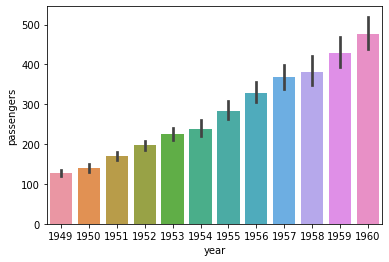

In [44]:
sns.barplot(x='year', y='passengers', data=df)
plt.show()

In [45]:
df.loc[df.year == 1960, 'passengers'].std()

77.73712501797714

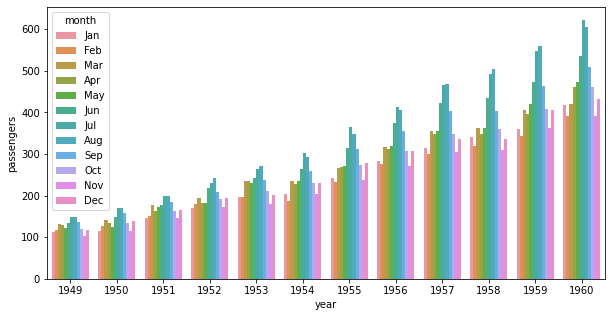

In [46]:
# hue를 지정하면 분류를 한 번 더해줌
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='passengers', hue='month', data=df)
plt.show()

In [47]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


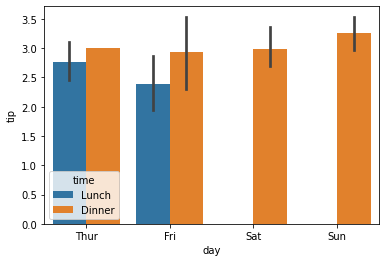

In [48]:
sns.barplot(x='day', y='tip', hue='time', data=tips)
plt.show()

## 6-4. Count Plot
* x축에 해당하는 데이터가 몇 개 있는지 보여줌

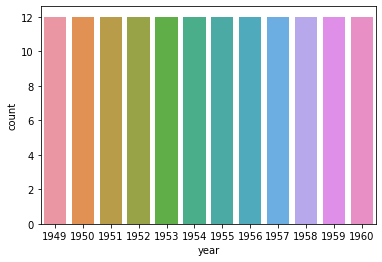

In [49]:
sns.countplot(x='year', data=df)
plt.show()

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


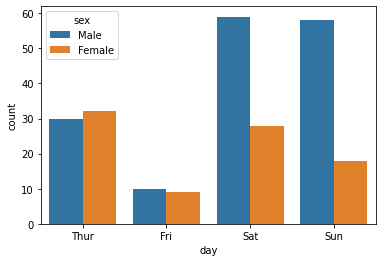

In [51]:
sns.countplot(x='day', hue='sex', data=tips)
plt.show()

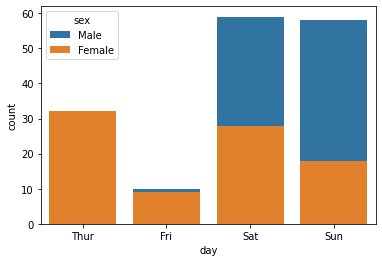

In [52]:
sns.countplot(x='day', hue='sex', dodge=False, data=tips)
plt.show()

## 6-5. Box Plot (Box-and-Whisker Plot) 
* 최소값, 최대값, 중앙값, 제1사분위수, 제3사분위수
* 이상치(Outlier)를 감지하는데 사용됨

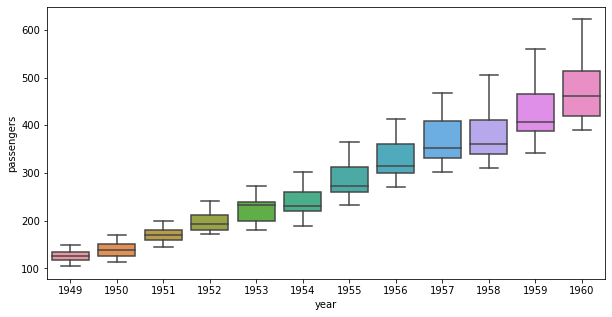

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='year', y='passengers', data=df)
plt.show()

In [54]:
df.loc[df.year == 1960].describe()

,year,passengers
count,12.0,12.000000
mean,1960.0,476.166667
std,0.0,77.737125
min,1960.0,390.000000
25%,1960.0,418.500000
50%,1960.0,461.000000
75%,1960.0,514.750000
max,1960.0,622.000000


In [55]:
# IQR(InterQuartile Range) = Q3 - Q1
IQR = 514.75 - 418.5
IQR

96.25

In [56]:
# boxplot의 max값
514.75+IQR * 1.5

659.125

In [57]:
# boxplot의 min값
418.55 - IQR * 1.5

274.175

In [58]:
df.loc[df.year == 1960]

,year,month,passengers
132,1960,Jan,417
133,1960,Feb,391
134,1960,Mar,419
135,1960,Apr,461
136,1960,May,472
137,1960,Jun,535
138,1960,Jul,622
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461


In [59]:
df.loc[132, 'passengers'] = 700
df.loc[df.year == 1960]

,year,month,passengers
132,1960,Jan,700
133,1960,Feb,391
134,1960,Mar,419
135,1960,Apr,461
136,1960,May,472
137,1960,Jun,535
138,1960,Jul,622
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461


## 6-6. Violin Plot


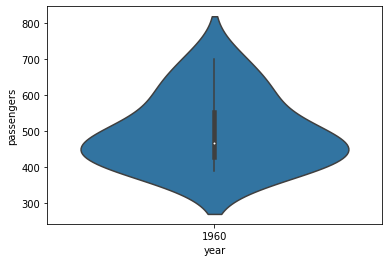

In [60]:
sns.violinplot(x='year', y='passengers', data=df[df.year==1960])
plt.show()

## 6.7 Heatmap
* 값의 변화를 색상표를 통해 알 수 있음

In [61]:
flights = df.pivot_table(index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,700
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


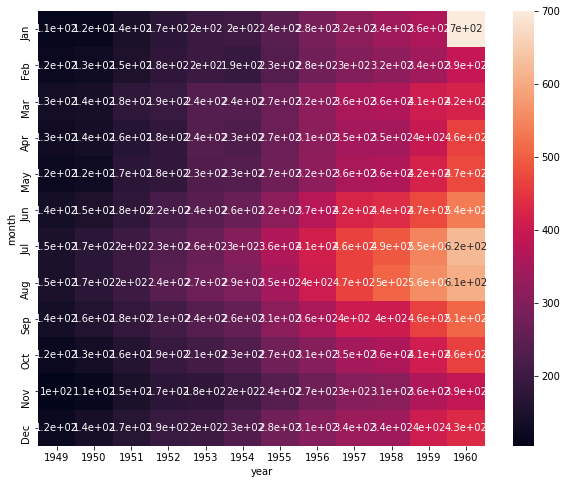

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(data=flights, annot=True) # d:정수, f:실수
plt.show()

In [63]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


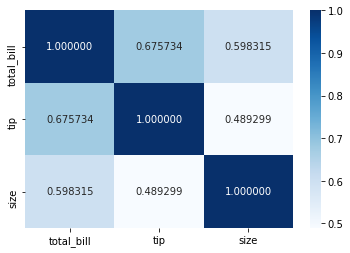

In [64]:
sns.heatmap(tips.corr(), annot=True, fmt='f', cmap='Blues')
plt.show()